# 이 문서는 2차 최종 결과에 산출한 결과이다.

# 1. 분석 방법


### 1. Test X를 시계열 모델로 예측

사용한 모델
1. Exponential Smoothing 
2. HoltWinters
3. RandomForest

### 2. 과거 너울성파도 및 기상 불량 정보로 feature로 만들어서 분류로 모델링


# 2. 전략

### 1. 일 및 과거 1일 너울성파도발생시간, 과거3일너울성파도발생시간 Feature을 사용해서 너울성 파도가 발생하지 않는 날을 0으로 둔다.

### 2. 일 및 과거1일너울성파도발생시간 및 기타 Feature를 사용해서 너울성 파도가 발생한 일 수를 구한다.

In [13]:
import os
import sys
import numpy as np
import pandas as pd

path_name = os.path.abspath(os.path.dirname(os.getcwd()))
folder_path = '/analysis/engine/'

sys.path.append(path_name + folder_path)
print(path_name + folder_path)

/Users/sailyourlife/Google Drive/Foresight/201805 - 201808/POSCO 공모전/실전/analysis/engine/


In [31]:
#data = pd.read_csv('../../data/preprocessed/df_last.csv')
data = pd.read_csv('../data/preprocessed data/df_xy_final.csv')

In [32]:
data.columns

Index(['ds', '기상불량발생여부', '너울성파도발생여부', '테스트여부', '453_일평균수온', '453_일최고수온',
       '453_일최저수온', '453_일평균유의파고', '453_일평균파고', '453_일최고유의파고', '453_일최고최대파고',
       '453_일평균파주기', '453_일최고파주기', '기온(°C)', '현지기압(hPa)', '해면기압(hPa)',
       '지면온도(°C)', '30cm 지중온도(°C)', '106_일평균수온', '106_일최고수온', '106_일최저수온',
       '106_일평균유의파고', '106_일평균파고', '106_일최고유의파고', '106_일최고최대파고', '106_일평균파주기',
       '106_일최고파주기', '과거3일너울성파도발생시간', '과거10일너울성파도발생시간', '과거3일기상불량시간',
       '과거10일기상불량시간', '과거1일너울성파도발생시간', '과거1일기상불량시간'],
      dtype='object')

In [18]:
data['ds'] = pd.to_datetime(data['ds'])

In [19]:
data.set_index('ds', inplace=True)

In [5]:
data.columns

Index(['ds', '기상불량발생여부', '너울성파도발생여부', '테스트여부', '453_일평균수온', '453_일최고수온',
       '453_일최저수온', '453_일평균유의파고', '453_일평균파고', '453_일최고유의파고', '453_일최고최대파고',
       '453_일평균파주기', '453_일최고파주기', '106_일평균수온', '106_일최고수온', '106_일최저수온',
       '106_일평균유의파고', '106_일평균파고', '106_일최고유의파고', '106_일최고최대파고', '106_일평균파주기',
       '106_일최고파주기', '과거1일너울성파도발생시간', '과거3일너울성파도발생시간', '과거10일너울성파도발생시간'],
      dtype='object')

In [6]:
from Engine import ForesightEngine

In [7]:
engine = ForesightEngine(data)

In [12]:
engine.x_train[24]

,453_일평균수온,453_일최고수온,453_일최저수온,453_일평균유의파고,453_일평균파고,453_일최고유의파고,453_일최고최대파고,453_일평균파주기,453_일최고파주기,106_일평균수온,...,106_일최저수온,106_일평균유의파고,106_일평균파고,106_일최고유의파고,106_일최고최대파고,106_일평균파주기,106_일최고파주기,과거1일너울성파도발생시간,과거3일너울성파도발생시간,과거10일너울성파도발생시간
ds,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,13.7,13.8,13.6,0.6,0.4,0.9,1.2,5.9,6.7,13.0,...,13.0,1.2,0.9,1.5,2.4,5.4,8.0,0.0,0.0,0.0
2014-01-01 01:00:00,13.7,13.8,13.6,0.6,0.4,0.9,1.2,5.9,6.7,13.0,...,13.0,1.2,0.9,1.5,2.4,5.4,8.0,0.0,0.0,0.0
2014-01-01 02:00:00,13.7,13.8,13.6,0.6,0.4,0.9,1.2,5.9,6.7,13.0,...,13.0,1.2,0.9,1.5,2.4,5.4,8.0,0.0,0.0,0.0
2014-01-01 03:00:00,13.7,13.8,13.6,0.6,0.4,0.9,1.2,5.9,6.7,13.0,...,13.0,1.2,0.9,1.5,2.4,5.4,8.0,0.0,0.0,0.0
2014-01-01 04:00:00,13.7,13.8,13.6,0.6,0.4,0.9,1.2,5.9,6.7,13.0,...,13.0,1.2,0.9,1.5,2.4,5.4,8.0,0.0,0.0,0.0
2014-01-01 05:00:00,13.7,13.8,13.6,0.6,0.4,0.9,1.2,5.9,6.7,13.0,...,13.0,1.2,0.9,1.5,2.4,5.4,8.0,0.0,0.0,0.0
2014-01-01 06:00:00,13.7,13.8,13.6,0.6,0.4,0.9,1.2,5.9,6.7,13.0,...,13.0,1.2,0.9,1.5,2.4,5.4,8.0,0.0,0.0,0.0
2014-01-01 07:00:00,13.7,13.8,13.6,0.6,0.4,0.9,1.2,5.9,6.7,13.0,...,13.0,1.2,0.9,1.5,2.4,5.4,8.0,0.0,0.0,0.0
2014-01-01 08:00:00,13.7,13.8,13.6,0.6,0.4,0.9,1.2,5.9,6.7,13.0,...,13.0,1.2,0.9,1.5,2.4,5.4,8.0,0.0,0.0,0.0


In [8]:
#engine.predict_test_x()

In [9]:
engine.load_test_x(folder_path='../data/preprocessed data/x_test')

X TEST LOADED


In [11]:
engine.train_model(class_weight={0:1, 1:2}, max_depth=7)

TRAIN COMPLETED 0 th RANDOMFOREST MODEL
TRAIN COMPLETED 1 th RANDOMFOREST MODEL
TRAIN COMPLETED 2 th RANDOMFOREST MODEL
TRAIN COMPLETED 3 th RANDOMFOREST MODEL
TRAIN COMPLETED 4 th RANDOMFOREST MODEL
TRAIN COMPLETED 5 th RANDOMFOREST MODEL
TRAIN COMPLETED 6 th RANDOMFOREST MODEL
TRAIN COMPLETED 7 th RANDOMFOREST MODEL
TRAIN COMPLETED 8 th RANDOMFOREST MODEL
TRAIN COMPLETED 9 th RANDOMFOREST MODEL
TRAIN COMPLETED 10 th RANDOMFOREST MODEL
TRAIN COMPLETED 11 th RANDOMFOREST MODEL
TRAIN COMPLETED 12 th RANDOMFOREST MODEL
TRAIN COMPLETED 13 th RANDOMFOREST MODEL
TRAIN COMPLETED 14 th RANDOMFOREST MODEL
TRAIN COMPLETED 15 th RANDOMFOREST MODEL
TRAIN COMPLETED 16 th RANDOMFOREST MODEL
TRAIN COMPLETED 17 th RANDOMFOREST MODEL
TRAIN COMPLETED 18 th RANDOMFOREST MODEL
TRAIN COMPLETED 19 th RANDOMFOREST MODEL
TRAIN COMPLETED 20 th RANDOMFOREST MODEL
TRAIN COMPLETED 21 th RANDOMFOREST MODEL
TRAIN COMPLETED 22 th RANDOMFOREST MODEL
TRAIN COMPLETED 23 th RANDOMFOREST MODEL
TRAIN COMPLETED 24 th RAND

In [13]:
engine.predict_test_y()

In [14]:
for i in range(25):
    print("Train " + str(i+1))
    print(engine.y_test[i].index[0], "\n")
    print(engine.y_probs[i], "\n")

Train 1
2014-05-18 07:00:00 

[0.89493616 0.89493616 0.89493616 0.89493616 0.89493616 0.89493616
 0.89493616 0.89493616 0.89493616 0.89603093 0.89603093 0.89603093
 0.89133617 0.88372423 0.86871718 0.86871718 0.86871718 0.86871718
 0.86362258 0.84962258 0.84962258 0.83962258 0.83962258 0.81152734] 

Train 2
2014-07-06 07:00:00 

[8.16326531e-06 8.16326531e-06 8.16326531e-06 8.16326531e-06
 8.16326531e-06 8.16326531e-06 8.16326531e-06 8.16326531e-06
 8.16326531e-06 8.16326531e-06 8.16326531e-06 8.16326531e-06
 8.16326531e-06 8.16326531e-06 8.16326531e-06 8.16326531e-06
 8.16326531e-06 8.16326531e-06 8.16326531e-06 8.16326531e-06
 8.16326531e-06 8.16326531e-06 8.16326531e-06 8.16326531e-06] 

Train 3
2014-09-25 07:00:00 

[0.00489209 0.00489209 0.00489209 0.00489209 0.00489209 0.00489209
 0.00489209 0.00489209 0.00489209 0.00489209 0.00489209 0.00489209
 0.00489209 0.00489209 0.00489209 0.00489209 0.00489209 0.00489209
 0.00489209 0.00489209 0.00489209 0.00489209 0.00489209 0.00489209] 


In [15]:
for i in range(25):
    print("Train " + str(i+1))
    print(engine.y_test[i].index[0], "\n")
    print(np.mean(engine.y_probs[i]), "\n")

Train 1
2014-05-18 07:00:00 

0.8769203148724655 

Train 2
2014-07-06 07:00:00 

8.16326530612245e-06 

Train 3
2014-09-25 07:00:00 

0.004892086330935252 

Train 4
2014-10-23 07:00:00 

0.8556130602781081 

Train 5
2014-12-21 07:00:00 

0.06409544347528075 

Train 6
2015-01-13 07:00:00 

0.8361027646863622 

Train 7
2015-04-04 07:00:00 

0.001790945368563861 

Train 8
2015-06-27 07:00:00 

0.0006779661016949153 

Train 9
2015-07-18 07:00:00 

0.7264610356490677 

Train 10
2015-11-13 07:00:00 

0.6967849008284057 

Train 11
2015-12-13 07:00:00 

0.6679638454759022 

Train 12
2016-01-22 07:00:00 

0.8490320183416363 

Train 13
2016-03-04 07:00:00 

0.014611441056161264 

Train 14
2016-08-30 07:00:00 

0.9309041465328236 

Train 15
2016-10-20 07:00:00 

3.641308733541342e-05 

Train 16
2016-11-30 07:00:00 

0.00794968511722371 

Train 17
2016-12-26 07:00:00 

0.04544571397624166 

Train 18
2017-02-12 07:00:00 

0.8410891485881308 

Train 19
2017-03-15 07:00:00 

0.0058076620468437935 

T

### 풀이 1. 1% 미만으로 발생하는 날은 모두 너울성파도가 발생하지 않았다고 판단한다.
### 풀이 2. 90% 이상으로 발생하는 날은 모두 너울성파도가 발생했다고 판단한다.

### 풀이 3. 이외에는 2부류로 남는다.
#### 1) 평균 60% 이상 발생하는 날짜
#### 2) 1% 미만으로 발생하는 날짜 

# 2. 확률 값을 기반으로 나머지 너울성 파도 일을 예측한다.

In [68]:
#data = pd.read_csv('../../data/preprocessed/df_last.csv')
data = pd.read_csv('../../data/preprocessed/df_2nd_plus.csv')

In [69]:
data.columns

Index(['ds', '기상불량발생여부', '너울성파도발생여부', '테스트여부', '453_일평균수온', '453_일최고수온',
       '453_일최저수온', '453_일평균유의파고', '453_일평균파고', '453_일최고유의파고', '453_일최고최대파고',
       '453_일평균파주기', '453_일최고파주기', '기온(°C)', '현지기압(hPa)', '해면기압(hPa)',
       '지면온도(°C)', '30cm 지중온도(°C)', '106_일평균수온', '106_일최고수온', '106_일최저수온',
       '106_일평균유의파고', '106_일평균파고', '106_일최고유의파고', '106_일최고최대파고', '106_일평균파주기',
       '106_일최고파주기', '과거3일너울성파도발생시간', '과거10일너울성파도발생시간', '과거3일기상불량시간',
       '과거10일기상불량시간', '과거1일너울성파도발생시간', '과거1일기상불량시간'],
      dtype='object')

In [70]:
data = data[['ds', '기상불량발생여부', '너울성파도발생여부', '테스트여부', '453_일평균수온', '453_일최고수온',
       '453_일최저수온', '453_일평균유의파고', '453_일평균파고', '453_일최고유의파고', '453_일최고최대파고',
       '453_일평균파주기', '453_일최고파주기', '기온(°C)', '현지기압(hPa)', '해면기압(hPa)',
       '지면온도(°C)', '30cm 지중온도(°C)', '106_일평균수온', '106_일최고수온', '106_일최저수온',
       '106_일평균유의파고', '106_일평균파고', '106_일최고유의파고', '106_일최고최대파고', '106_일평균파주기',
       '106_일최고파주기', '과거1일너울성파도발생시간', '과거3일너울성파도발생시간']]

In [71]:
from Engine import ForesightEngine
engine = ForesightEngine(data)
engine.load_test_x()

X TEST LOADED


In [72]:
engine.train_model(class_weight={0:1, 1:2}, max_depth=7)

TRAIN COMPLETED 0 th RANDOMFOREST MODEL
TRAIN COMPLETED 1 th RANDOMFOREST MODEL
TRAIN COMPLETED 2 th RANDOMFOREST MODEL
TRAIN COMPLETED 3 th RANDOMFOREST MODEL
TRAIN COMPLETED 4 th RANDOMFOREST MODEL
TRAIN COMPLETED 5 th RANDOMFOREST MODEL
TRAIN COMPLETED 6 th RANDOMFOREST MODEL
TRAIN COMPLETED 7 th RANDOMFOREST MODEL
TRAIN COMPLETED 8 th RANDOMFOREST MODEL
TRAIN COMPLETED 9 th RANDOMFOREST MODEL
TRAIN COMPLETED 10 th RANDOMFOREST MODEL
TRAIN COMPLETED 11 th RANDOMFOREST MODEL
TRAIN COMPLETED 12 th RANDOMFOREST MODEL
TRAIN COMPLETED 13 th RANDOMFOREST MODEL
TRAIN COMPLETED 14 th RANDOMFOREST MODEL
TRAIN COMPLETED 15 th RANDOMFOREST MODEL
TRAIN COMPLETED 16 th RANDOMFOREST MODEL
TRAIN COMPLETED 17 th RANDOMFOREST MODEL
TRAIN COMPLETED 18 th RANDOMFOREST MODEL
TRAIN COMPLETED 19 th RANDOMFOREST MODEL
TRAIN COMPLETED 20 th RANDOMFOREST MODEL
TRAIN COMPLETED 21 th RANDOMFOREST MODEL
TRAIN COMPLETED 22 th RANDOMFOREST MODEL
TRAIN COMPLETED 23 th RANDOMFOREST MODEL
TRAIN COMPLETED 24 th RAND

In [73]:
engine.predict_test_y()

In [74]:
for i in range(25):
    print("Train " + str(i+1))
    print(engine.y_test[i].index[0], "\n")
    print(engine.y_probs[i], "\n")

Train 1
2014-05-18 07:00:00 

[0.89204207 0.89793973 0.89793973 0.89793973 0.89204207 0.90638551
 0.88516473 0.88457649 0.86965897 0.85965897 0.85965897 0.84965897
 0.84965897 0.84965897 0.84965897 0.84965897 0.84965897 0.84965897
 0.84965897 0.83149844 0.83149844 0.8138327  0.8138327  0.7998327 ] 

Train 2
2014-07-06 07:00:00 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

Train 3
2014-09-25 07:00:00 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

Train 4
2014-10-23 07:00:00 

[0.84324465 0.81666429 0.82198772 0.82198772 0.82011552 0.80480302
 0.79492743 0.79492743 0.79492743 0.8005941  0.7945941  0.79527067
 0.81514626 0.82907945 0.83376695 0.82997248 0.82219471 0.82997248
 0.81853546 0.82341201 0.84757721 0.83939539 0.8295747  0.8195747 ] 

Train 5
2014-12-21 07:00:00 

[0.07831681 0.06939208 0.06939208 0.06582339 0.07785693 0.07785693
 0.07785693 0.07785693 0.07785693 0.07785693 0.07474812 0.07474812
 0.07474812 0.07474812

In [83]:
np.argmax(engine.y_probs[4])

0

In [77]:
for i in range(25):
    print("Train " + str(i+1))
    print(np.(engine.y_probs[i]) * 24, "\n")

Train 1
20.630773723747772 

Train 2
0.0 

Train 3
0.0 

Train 4
19.64224592299283 

Train 5
1.8215204495483714 

Train 6
20.18468965138653 

Train 7
0.17255788672852906 

Train 8
0.2372973977695167 

Train 9
18.515018640688155 

Train 10
14.59938808577094 

Train 11
16.0652098405129 

Train 12
20.492789513563107 

Train 13
0.29536719321212535 

Train 14
22.734196752044433 

Train 15
0.0349372712344756 

Train 16
0.13296065342709895 

Train 17
1.0849840823458505 

Train 18
20.469440278181473 

Train 19
0.38270790243131797 

Train 20
0.03120879857922873 

Train 21
0.3007979407979408 

Train 22
0.07509946611909651 

Train 23
0.11529411764705882 

Train 24
0.22681711730892057 

Train 25
1.3260874456942475 



### 2가지 타입 존재
1) 앞날부터 연속적으로 너울성 파도 발생
2) 며칠만 발생

# 3. 시간 제외하고 예측하기

In [84]:
#data = pd.read_csv('../../data/preprocessed/df_last.csv')
data = pd.read_csv('../../data/preprocessed/df_2nd_plus.csv')

In [85]:
data = data[['ds', '기상불량발생여부', '너울성파도발생여부', '테스트여부', '453_일평균수온', '453_일최고수온',
       '453_일최저수온', '453_일평균유의파고', '453_일평균파고', '453_일최고유의파고', '453_일최고최대파고',
       '453_일평균파주기', '453_일최고파주기', '기온(°C)', '현지기압(hPa)', '해면기압(hPa)',
       '지면온도(°C)', '30cm 지중온도(°C)', '106_일평균수온', '106_일최고수온', '106_일최저수온',
       '106_일평균유의파고', '106_일평균파고', '106_일최고유의파고', '106_일최고최대파고', '106_일평균파주기',
       '106_일최고파주기']]

In [86]:
from Engine import ForesightEngine
engine = ForesightEngine(data)
engine.load_test_x()

engine.train_model(class_weight={0:1, 1:2}, max_depth=7)

X TEST LOADED
TRAIN COMPLETED 0 th RANDOMFOREST MODEL
TRAIN COMPLETED 1 th RANDOMFOREST MODEL
TRAIN COMPLETED 2 th RANDOMFOREST MODEL
TRAIN COMPLETED 3 th RANDOMFOREST MODEL
TRAIN COMPLETED 4 th RANDOMFOREST MODEL
TRAIN COMPLETED 5 th RANDOMFOREST MODEL
TRAIN COMPLETED 6 th RANDOMFOREST MODEL
TRAIN COMPLETED 7 th RANDOMFOREST MODEL
TRAIN COMPLETED 8 th RANDOMFOREST MODEL
TRAIN COMPLETED 9 th RANDOMFOREST MODEL
TRAIN COMPLETED 10 th RANDOMFOREST MODEL
TRAIN COMPLETED 11 th RANDOMFOREST MODEL
TRAIN COMPLETED 12 th RANDOMFOREST MODEL
TRAIN COMPLETED 13 th RANDOMFOREST MODEL
TRAIN COMPLETED 14 th RANDOMFOREST MODEL
TRAIN COMPLETED 15 th RANDOMFOREST MODEL
TRAIN COMPLETED 16 th RANDOMFOREST MODEL
TRAIN COMPLETED 17 th RANDOMFOREST MODEL
TRAIN COMPLETED 18 th RANDOMFOREST MODEL
TRAIN COMPLETED 19 th RANDOMFOREST MODEL
TRAIN COMPLETED 20 th RANDOMFOREST MODEL
TRAIN COMPLETED 21 th RANDOMFOREST MODEL
TRAIN COMPLETED 22 th RANDOMFOREST MODEL
TRAIN COMPLETED 23 th RANDOMFOREST MODEL
TRAIN COMPLE

In [89]:
engine.predict_test_y()

In [90]:
for i in range(25):
    print("Train " + str(i+1))
    print(engine.y_test[i].index[0], "\n")
    print(engine.y_probs[i], "\n")

Train 1
2014-05-18 07:00:00 

[0.86285626 0.85285626 0.83075857 0.82279837 0.81614313 0.82614313
 0.79694175 0.75815257 0.74490492 0.74490492 0.72945038 0.71389482
 0.72389482 0.73389482 0.72389482 0.72389482 0.72389482 0.72389482
 0.72389482 0.72389482 0.72389482 0.72389482 0.72664776 0.71664776] 

Train 2
2014-07-06 07:00:00 

[1.06723586e-05 1.06723586e-05 1.06723586e-05 1.06723586e-05
 1.06723586e-05 1.06723586e-05 1.06723586e-05 1.06723586e-05
 1.06723586e-05 1.06723586e-05 1.06723586e-05 1.06723586e-05
 1.06723586e-05 1.00106724e-02 1.00106724e-02 1.06723586e-05
 1.06723586e-05 1.06723586e-05 1.06723586e-05 1.06723586e-05
 1.06723586e-05 1.06723586e-05 1.06723586e-05 1.06723586e-05] 

Train 3
2014-09-25 07:00:00 

[0.0958467  0.0958467  0.10296209 0.10659894 0.06934972 0.06934972
 0.06934972 0.07934972 0.07934972 0.07934972 0.07934972 0.06223434
 0.06223434 0.04752846 0.04768471 0.04768471 0.04768471 0.04768471
 0.04768471 0.04768471 0.04768471 0.04768471 0.04768471 0.04768471] 


In [93]:
for i in range(25):
    print("Train " + str(i+1))
    print(np.mean(engine.y_probs[i]) * 24, "\n")

Train 1
18.19204884245761 

Train 2
0.020256136606189967 

Train 3
1.5755467158875742 

Train 4
12.299731602347329 

Train 5
3.6321757546904996 

Train 6
20.28611611140586 

Train 7
1.0109875588763817 

Train 8
4.774815089375097 

Train 9
14.924549909126288 

Train 10
8.826276714959587 

Train 11
16.49856516846548 

Train 12
16.017335854584513 

Train 13
0.8282736398624155 

Train 14
21.46748688823723 

Train 15
0.26099328997240684 

Train 16
4.690849738624905 

Train 17
0.682610041498484 

Train 18
18.78687764956681 

Train 19
6.996073619110513 

Train 20
0.48416191970707845 

Train 21
9.746409403625297 

Train 22
2.696195905632659 

Train 23
6.905451958191913 

Train 24
3.8537391850170613 

Train 25
1.7788552270642213 



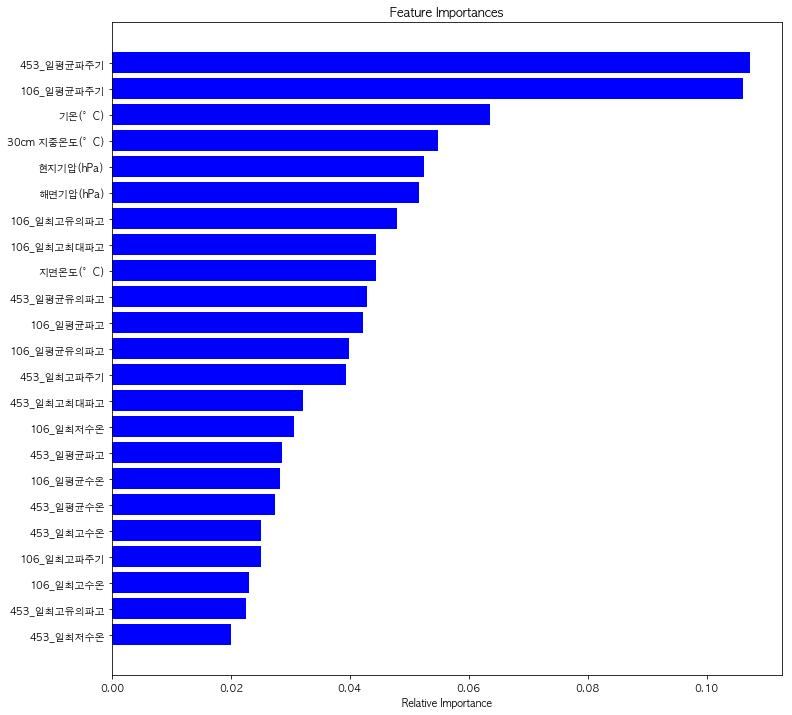

In [95]:
engine.show_feature_importance(0)